In [2]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import svd
import seaborn as sns
from scipy.stats import boxcox

In [3]:
#Loading data
filename = 'Weather Training Data.csv'
df = pd.read_csv(filename)

df = df.loc[df['Location'] == 'Sydney']

df = df[["RainToday", "MinTemp", "MaxTemp", "Evaporation", "Sunshine", "WindGustSpeed", "Humidity9am", "Pressure9am",
         "Cloud9am", "Temp9am", "Rainfall"]]

print(df)

      RainToday  MinTemp  MaxTemp  Evaporation  Sunshine  WindGustSpeed  \
20640       Yes     19.5     22.4          6.2       0.0            NaN   
20641       Yes     19.5     25.6          3.4       2.7            NaN   
20642       Yes     20.2     22.8          2.2       0.0            NaN   
20643       Yes     19.7     25.7          NaN       0.0            NaN   
20644       Yes     20.2     27.2          2.6       8.6            NaN   
...         ...      ...      ...          ...       ...            ...   
22996        No     13.2     19.1          1.0       0.2           26.0   
22997        No     11.2     18.3          2.2       1.9           37.0   
22998        No      9.3     19.2          2.0       9.2           30.0   
22999        No      9.4     17.7          2.4       2.7           24.0   
23000        No      7.6     19.3          3.4       9.4           35.0   

       Humidity9am  Pressure9am  Cloud9am  Temp9am  Rainfall  
20640         92.0       1017.6     

In [4]:
#Looking at data for missing values
print("Data and its number of missing values.")
print(df.isnull().sum())

Data and its number of missing values.
RainToday          3
MinTemp            3
MaxTemp            2
Evaporation       37
Sunshine          12
WindGustSpeed    742
Humidity9am       12
Pressure9am       13
Cloud9am         418
Temp9am            4
Rainfall           3
dtype: int64


In [5]:
# We remove all the places where RainToday is zero
df = df.dropna(subset=["RainToday"])

print("Data with removed RainToday data points.")
print(df.isnull().sum())

Data with removed RainToday data points.
RainToday          0
MinTemp            3
MaxTemp            2
Evaporation       37
Sunshine          12
WindGustSpeed    741
Humidity9am       12
Pressure9am       13
Cloud9am         417
Temp9am            4
Rainfall           0
dtype: int64


In [6]:
# We insert the mean on all NaN's in the dataset
for x in list(df.columns.values)[1:]:
    df[x] = df[x].fillna(df[x].mean())

print("Data with modified mean values.")
print(df.isnull().sum())

# We turn Yes and No into binary
df.loc[df.RainToday == "Yes", "RainToday"] = 1
df.loc[df.RainToday == "No", "RainToday"] = 0

print("Data with binary modified RainToday")
print(df.head())

Data with modified mean values.
RainToday        0
MinTemp          0
MaxTemp          0
Evaporation      0
Sunshine         0
WindGustSpeed    0
Humidity9am      0
Pressure9am      0
Cloud9am         0
Temp9am          0
Rainfall         0
dtype: int64
Data with binary modified RainToday
      RainToday  MinTemp  MaxTemp  Evaporation  Sunshine  WindGustSpeed  \
20640         1     19.5     22.4     6.200000       0.0      41.804576   
20641         1     19.5     25.6     3.400000       2.7      41.804576   
20642         1     20.2     22.8     2.200000       0.0      41.804576   
20643         1     19.7     25.7     5.132357       0.0      41.804576   
20644         1     20.2     27.2     2.600000       8.6      41.804576   

       Humidity9am  Pressure9am  Cloud9am  Temp9am  Rainfall  
20640         92.0       1017.6       8.0     20.7      15.6  
20641         83.0       1017.9       7.0     22.4       6.0  
20642         83.0       1014.2       8.0     21.4      18.8  
20643  

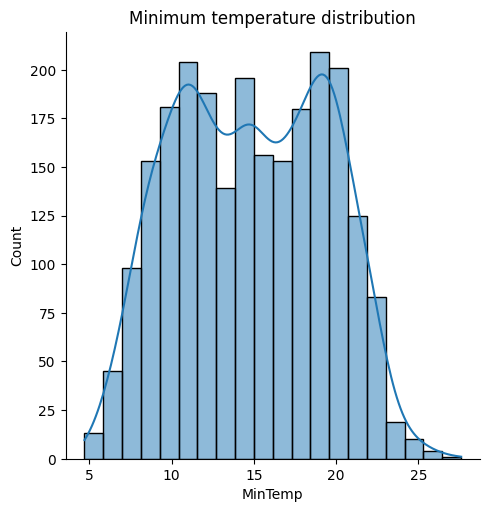

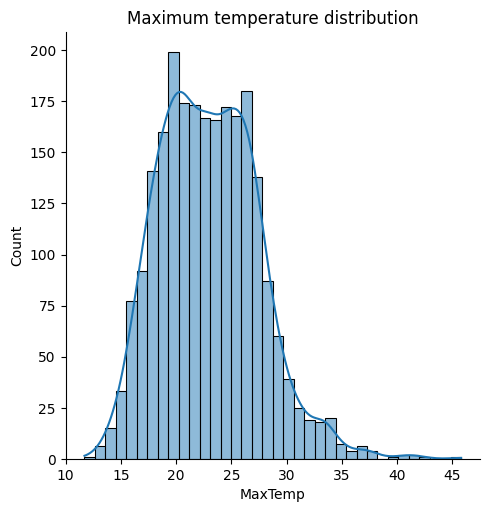

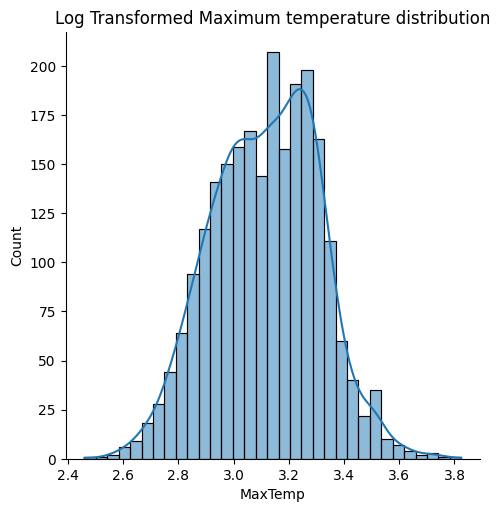

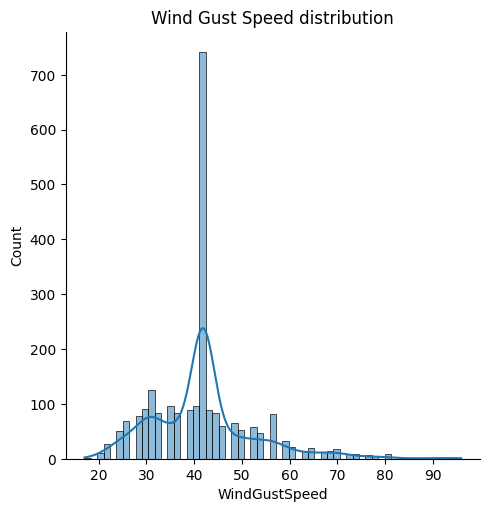

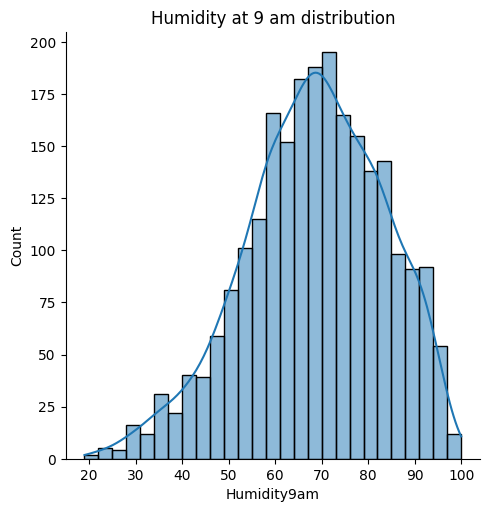

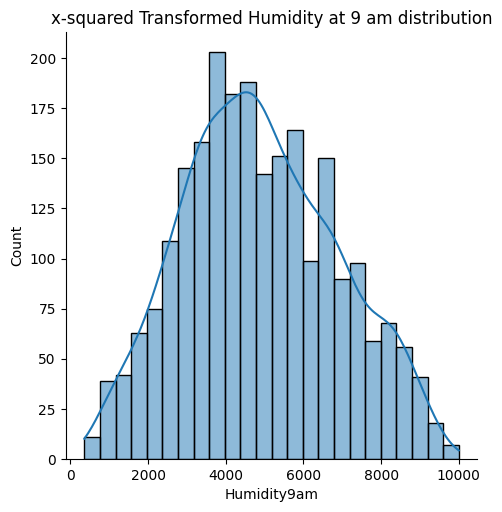

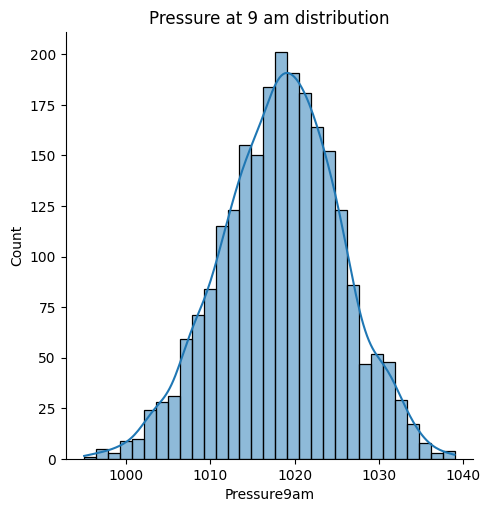

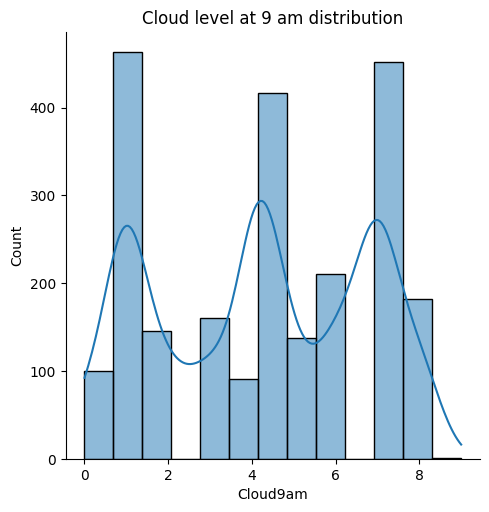

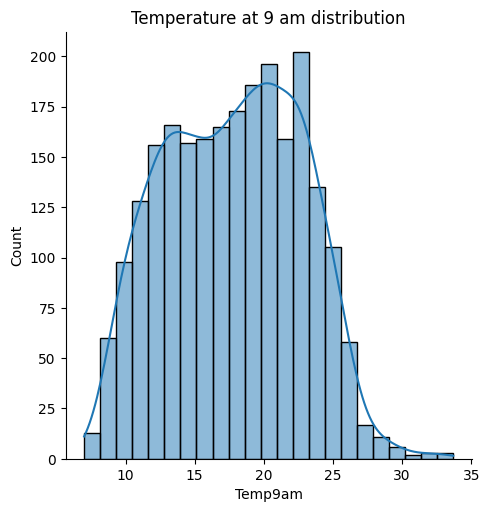

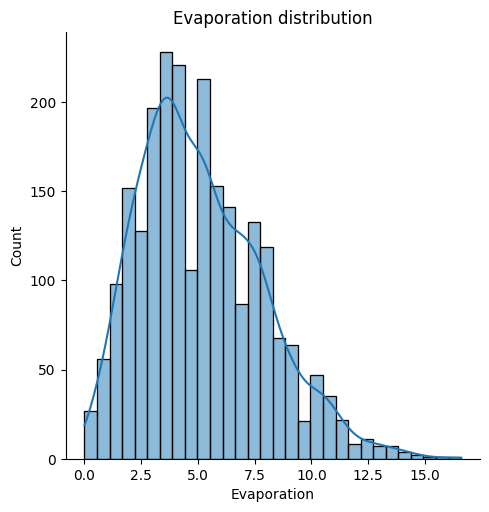

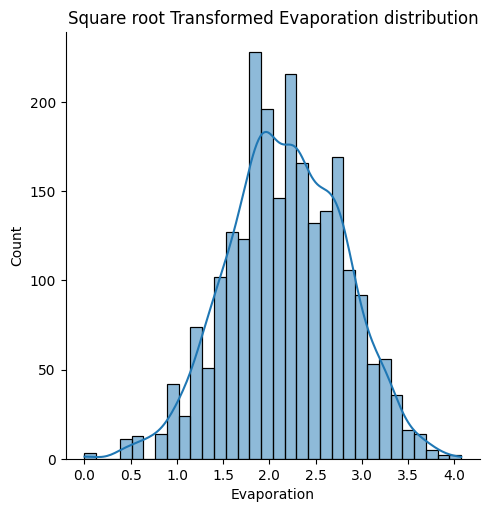

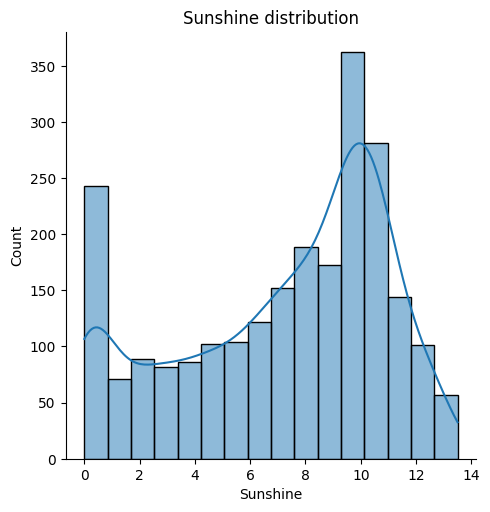

In [7]:

sns.displot(df, x='MinTemp', kde=True)
plt.title("Minimum temperature distribution")
plt.show()

sns.displot(df, x="MaxTemp", kde=True)
plt.title("Maximum temperature distribution")
plt.show()

target = np.log(df['MaxTemp'])
sns.displot(data=target, kde=True)
plt.title("Log Transformed Maximum temperature distribution")
plt.show()

sns.displot(df, x="WindGustSpeed", kde=True)
plt.title("Wind Gust Speed distribution")
plt.show()

sns.displot(df, x="Humidity9am", kde=True)
plt.title("Humidity at 9 am distribution")
plt.show()

target = np.square(df['Humidity9am'])
sns.displot(data=target, kde=True)
plt.title("x-squared Transformed Humidity at 9 am distribution")
plt.show()

sns.displot(df, x="Pressure9am", kde=True)
plt.title("Pressure at 9 am distribution")
plt.show()

sns.displot(df, x="Cloud9am", kde=True)
plt.title("Cloud level at 9 am distribution")
plt.show()

sns.displot(df, x="Temp9am", kde=True)
plt.title("Temperature at 9 am distribution")
plt.show()

# sns.displot(df, x="Rainfall", kde=True)
# plt.title("Rainfall during the day distribution")
# plt.show()

# target = np.log(df['Rainfall'])
# sns.displot(data=target, kde=True)
# plt.title("Log Transformed Rainfall during the day distribution")
# plt.show()

sns.displot(df, x="Evaporation", kde=True)
plt.title("Evaporation distribution")
plt.show()

target = np.sqrt(df['Evaporation'])
sns.displot(data=target, kde=True)
plt.title("Square root Transformed Evaporation distribution")
plt.show()

sns.displot(df, x="Sunshine", kde=True)
plt.title("Sunshine distribution")
plt.show()

In [8]:
#We want to transform the data:
print(df.head())

      RainToday  MinTemp  MaxTemp  Evaporation  Sunshine  WindGustSpeed  \
20640         1     19.5     22.4     6.200000       0.0      41.804576   
20641         1     19.5     25.6     3.400000       2.7      41.804576   
20642         1     20.2     22.8     2.200000       0.0      41.804576   
20643         1     19.7     25.7     5.132357       0.0      41.804576   
20644         1     20.2     27.2     2.600000       8.6      41.804576   

       Humidity9am  Pressure9am  Cloud9am  Temp9am  Rainfall  
20640         92.0       1017.6       8.0     20.7      15.6  
20641         83.0       1017.9       7.0     22.4       6.0  
20642         83.0       1014.2       8.0     21.4      18.8  
20643         88.0       1008.3       8.0     22.5      77.4  
20644         69.0       1002.7       6.0     23.8       1.6  


In [9]:
#We transform by the following operations:
df_trans = df.copy()
df_trans['Humidity9am'] = df_trans['Humidity9am'].transform(np.sqrt)
df_trans['Evaporation'] = df_trans['Evaporation'].transform(np.sqrt)
df_trans['MaxTemp'] = df_trans['MaxTemp'].transform(np.log)

#And get the following data:
print(df_trans.head())

      RainToday  MinTemp   MaxTemp  Evaporation  Sunshine  WindGustSpeed  \
20640         1     19.5  3.109061     2.489980       0.0      41.804576   
20641         1     19.5  3.242592     1.843909       2.7      41.804576   
20642         1     20.2  3.126761     1.483240       0.0      41.804576   
20643         1     19.7  3.246491     2.265471       0.0      41.804576   
20644         1     20.2  3.303217     1.612452       8.6      41.804576   

       Humidity9am  Pressure9am  Cloud9am  Temp9am  Rainfall  
20640     9.591663       1017.6       8.0     20.7      15.6  
20641     9.110434       1017.9       7.0     22.4       6.0  
20642     9.110434       1014.2       8.0     21.4      18.8  
20643     9.380832       1008.3       8.0     22.5      77.4  
20644     8.306624       1002.7       6.0     23.8       1.6  


Shape of data as numpy array: (2358, 9)


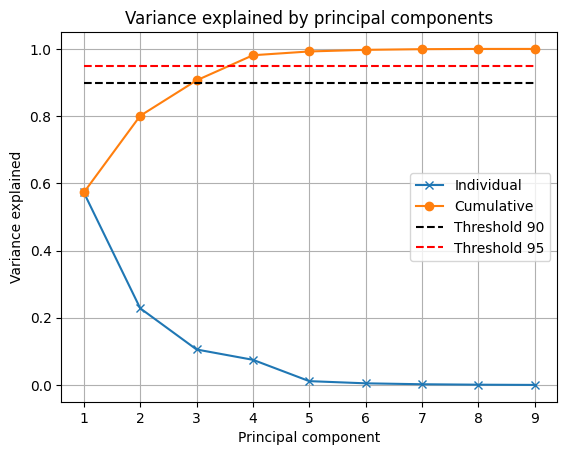

In [12]:
#PCA
# We turn the dataset into numpy array
X = df_trans[["MinTemp", "MaxTemp", "Evaporation", "Sunshine", "WindGustSpeed", "Humidity9am", "Pressure9am",
         "Cloud9am", "Temp9am"]].to_numpy()
N, M = X.shape
print(f"Shape of data as numpy array: {N,M}")

# Subtract mean value from data
Y = X - np.ones((N, 1)) * X.mean(axis=0)

# PCA by computing SVD of Y
U, S, Vh = svd(Y, full_matrices=False)
V = Vh.T

# Compute variance explained by principal components
rho = (S * S) / (S * S).sum()
#Explained variance
#Different threshold values
threshold90 = 0.9
threshold95 = 0.95

# Plot variance explained
plt.figure()
plt.plot(range(1, len(rho) + 1), rho, 'x-')
plt.plot(range(1, len(rho) + 1), np.cumsum(rho), 'o-')
plt.plot([1, len(rho)], [threshold90, threshold90], 'k--')
plt.plot([1, len(rho)], [threshold95, threshold95], 'r--')
plt.title('Variance explained by principal components');
plt.xlabel('Principal component');
plt.ylabel('Variance explained');
plt.legend(['Individual', 'Cumulative', 'Threshold 90', 'Threshold 95'])
plt.grid()
plt.show()

# We also want to do the correlation between the attributes

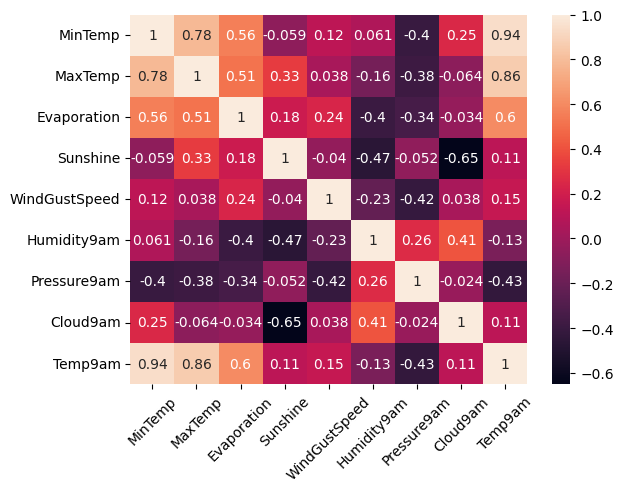

In [11]:
# We want to find the correlation
corr = df_trans[["MinTemp", "MaxTemp", "Evaporation", "Sunshine", "WindGustSpeed", "Humidity9am", "Pressure9am",
         "Cloud9am", "Temp9am"]].corr()

sns.heatmap(corr, annot=True)
plt.xticks(rotation=45)
plt.show()

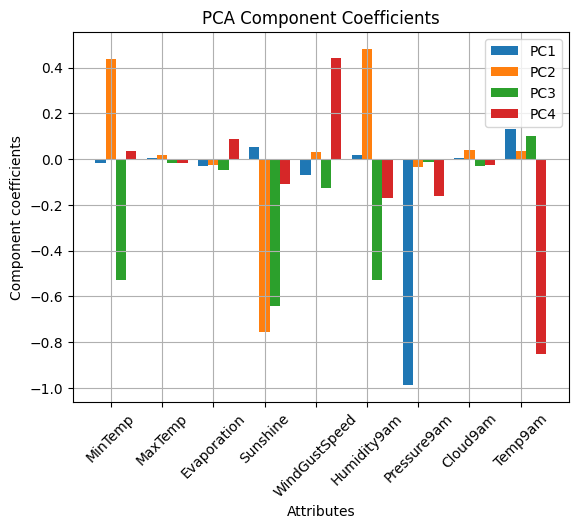

In [26]:
#Principal directions
pcs = [0,1,2,3]
legendStrs = ['PC'+str(e+1) for e in pcs]
c = ['r','g','b']
attributeNames = ["MinTemp", "MaxTemp", "Evaporation", "Sunshine", "WindGustSpeed", "Humidity9am", "Pressure9am",
         "Cloud9am", "Temp9am"]
bw = .2
r = np.arange(1,M+1)
for i in pcs:
    plt.bar(r+i*bw, V[:,i], width=bw)
plt.xticks(r+bw, attributeNames, rotation = 45)
plt.xlabel('Attributes')
plt.ylabel('Component coefficients')
plt.legend(legendStrs)
plt.grid()
plt.title('PCA Component Coefficients')
plt.show()

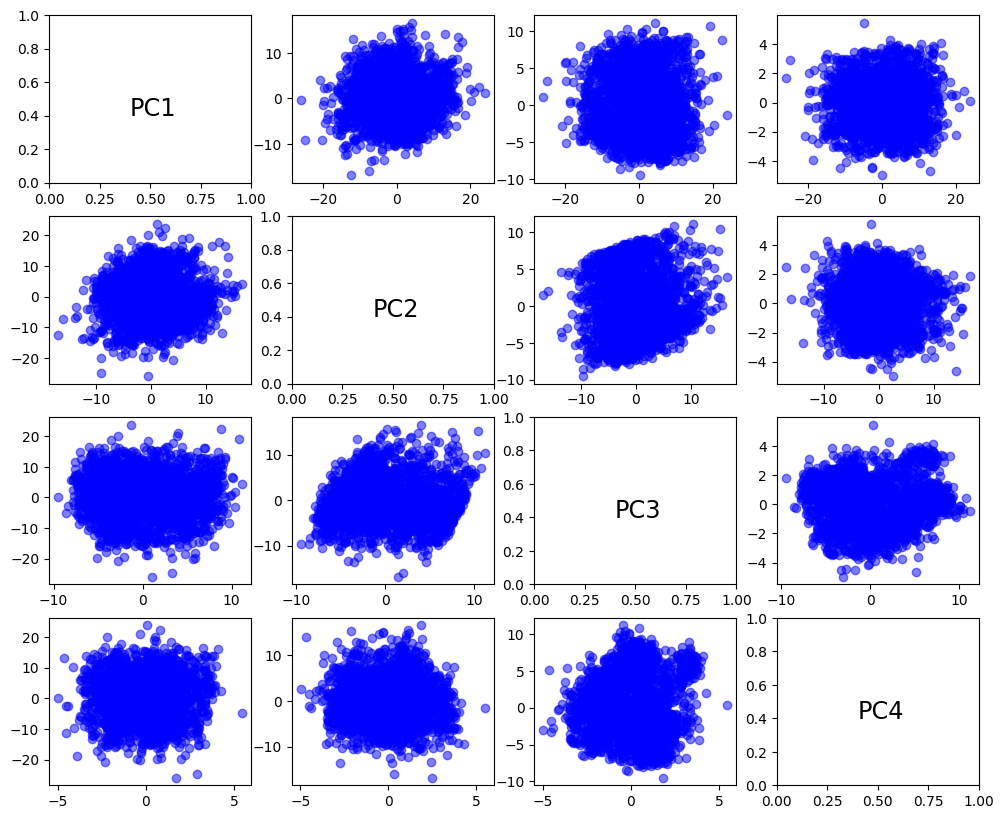

In [15]:
#PC plots

# scipy.linalg.svd returns "Vh", which is the Hermitian (transpose)
# of the vector V. So, for us to obtain the correct V, we transpose:
V = Vh.T

# Project the centered data onto principal component space
Z = Y @ V

# Plot PCA of the data
f = plt.figure(figsize = (12,10))

location = 1
pca_num = 0
for x in range(1,5,1):
    for y in range(1,5,1):

        plt.subplot(4,4, location)
        if location == 1 or location == 6 or location == 11 or location == 16:
            plt.text(0.4,0.4,f'PC{x}',fontsize="xx-large")

        else:
            plt.plot(Z[:, x], Z[:, y], 'o', alpha=.5)

        location += 1

# Output result to screen
plt.show()